# 138. Copy List with Random Pointer
A linked list is given such that each node contains an additional random pointer which could point to any node in the list or null.

Return a deep copy of the list.

 

Example 1:

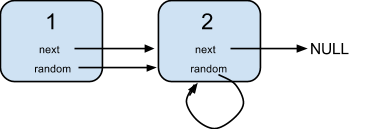

Input:
{"$id":"1","next":{"$id":"2","next":null,"random":{"$ref":"2"},"val":2},"random":{"$ref":"2"},"val":1}

Explanation:
Node 1's value is 1, both of its next and random pointer points to Node 2.
Node 2's value is 2, its next pointer points to null and its random pointer points to itself.
 

Note:

You must return the copy of the given head as a reference to the cloned list.
## Approach 1: Hash

https://www.youtube.com/watch?v=OvpKeraoxW0


## Approach 2: 
1. Just iterate the linked list and create copies of the nodes on the go. Since a node can be referenced from multiple nodes due to the random pointers, make sure you are not making multiple copies of the same node.

2. We can avoid using extra space for old node ---> new node mapping, by tweaking the original linked list. Simply interweave the nodes of the old and copied list. For e.g.

Old List: A --> B --> C --> D
InterWeaved List: A --> A' --> B 

3. The interweaving is done using next pointers and we can make use of interweaved structure to get the correct reference nodes for random pointers.



1. Copy a new node after each node in the original list

2. Assign a random pointer to the new node in turn, and this assignment is very easy cur->next->random = cur->random->next

3. Disconnect the linked list to get a new list after deep copying

The reason why is because this method is relatively subtle compared to the general solution (such as using Hash map) to deal, on top of this solution does not require additional space .

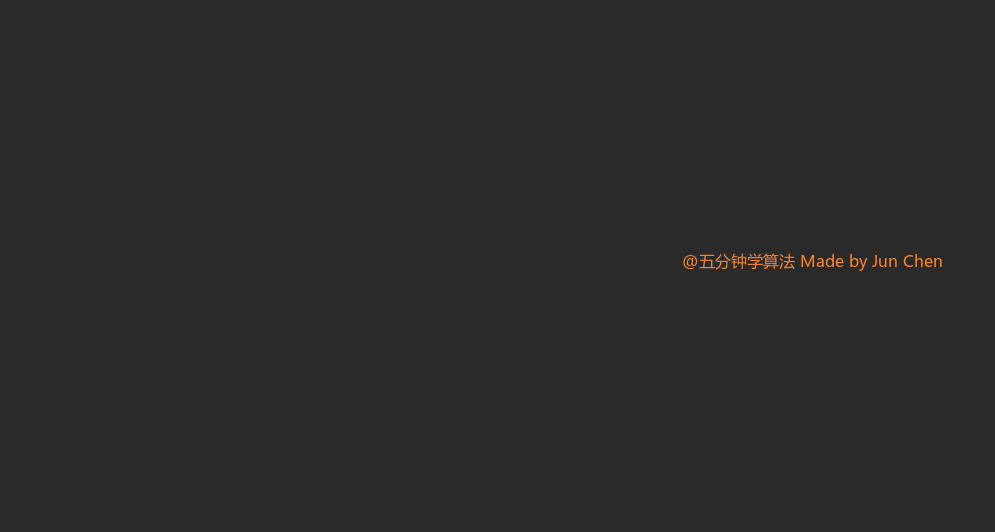

In [ ]:
class Node:
    def __init__(self, val, next, random):
        self.val = val
        self.next = next
        self.random = random

def copyRandomList(head):
    """dict with old Nodes as keys and new Nodes as values. Doing so allows us to create node's next and random as we iterate through the list from head to tail. Otherwise, we need to go through the list backwards.
    defaultdict() is an efficient way of handling missing keys """ 
    map_newNode = collections.defaultdict(lambda: Node(None,None,None))
    ## if a node's next or random is None, their value will be None but not a new Node, doing so removes the if-else check in the while loop
    map_newNode[None] = None
    cur = head
    while cur:
        map_newNode[cur].val = cur.val
        map_newNode[cur].next = map_newNode[cur.next]
        map_newNode[cur].random = map_newNode[cur.random]
        cur = cur.next

    return map_newNode[head]
        

In [ ]:
def copyRandomList(self, head):
    if not head:
        return None
    p = head
    # 1st loop to create clone node with next link
    while p:
        node = Node(p.val,None,None)
        node.next = p.next
        p.next = node
        p = node.next
    # 2nd loop to create random link
    p = head
    while p:
        if p.random:
            p.next.random = p.random.next
        p = p.next.next
    # split old and new list
    newhead = head.next
    pold,pnew = head,newhead
    while pnew.next:
        # split old
        pold.next = pnew.next
        pold = pold.next
        # slpit new
        pnew.next = pold.next
        pnew = pnew.next
    pold.next, pnew.next = None,None
    return newhead
